# Cardiac Arrhythmia Multi-Class Classification 

Analyze data and address missing data if there is any. 

Decide aboute a good evaluation strategy and justify your choice. 

Find the best parameters for the following classification models: 
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 




#### Loading required libraries

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

#### Creating list of columns names based on the Metadata.docx file

In [284]:
columns = ["Age","Gender_Nom","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R_Prime","S_Prime","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVRL1","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Q_Wave","R_Wave","S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA",
"DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279",
"Class_Nom"]

#### Reading from the CSV file in local dir

In [285]:
data = pd.read_csv('cardiac_arrhythmia.csv',delimiter=',', names = columns, na_values=['?'])
data.head()

,Age,Gender_Nom,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Class_Nom
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [286]:
data.shape

(452, 280)

#### Descriptive Statistics of the data

In [287]:
data.describe()

,Age,Gender_Nom,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Class_Nom
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


#### Checking the datatypes present in the dataset

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class_Nom
dtypes: float64(121), int64(159)
memory usage: 988.8 KB


#### Looking for missing observations

In [290]:
pd.isnull(data).values.any()

True

In [291]:
missing_data = data.isnull().sum()
missing_data=pd.DataFrame(missing_data[missing_data>0])
missing_data

,0
T,8
P,22
QRST,1
J,376
Heart_Rate,1


#### Visualizing the missing values to see if any values are missing together or if there is a non-random pattern

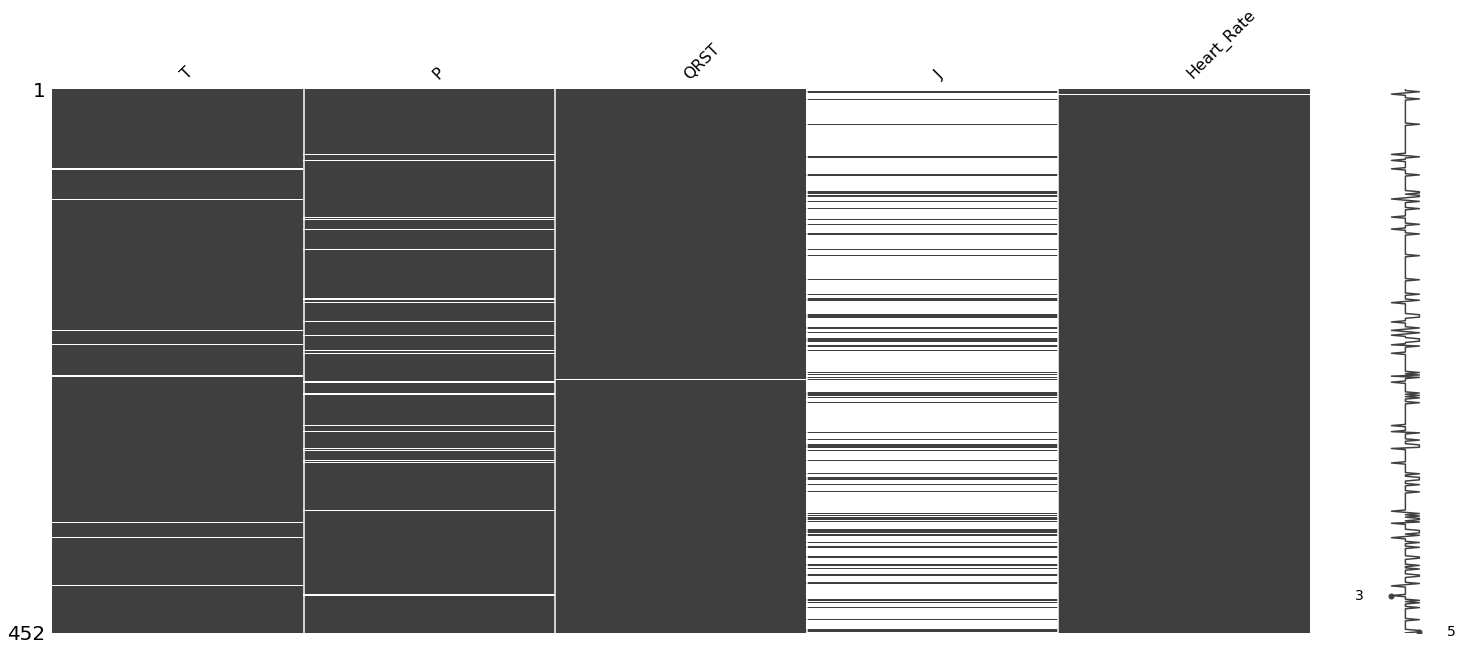

In [292]:
import missingno as msno
fig = plt.figure(figsize=(20,8))
msno.matrix(data[["T","P","QRST","J","Heart_Rate"]])

#### Removing observations where data is missing for "QRST" & "Heart_Rate"

In [293]:
data2 = data.dropna(subset=["QRST","Heart_Rate"])
data2.shape

(450, 280)

In [294]:
missing_data2 = data2.isnull().sum()
missing_data2=pd.DataFrame(missing_data2[missing_data2>0])
missing_data2

,0
T,8
P,22
J,375


#### Checking if there are any outliers to decide whether to use mean or median for imputing missing observations

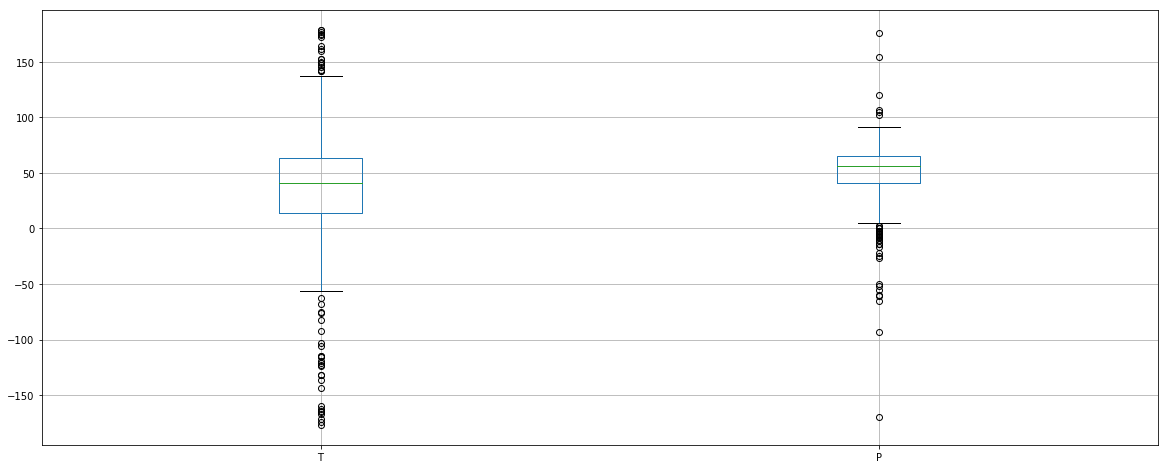

In [295]:
fig = plt.figure(figsize=(20,8))
data[["T","P"]].boxplot()

#### As there are many outliers in the dataset, let's impute the missing observations using the 'median'

In [296]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = np.nan, strategy = 'median', axis=0)
data2[["T","P"]] = imputer.fit_transform(data2[["T","P"]])

C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HPHP\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [297]:
data2[["T","P"]].isnull().sum()

T    0
P    0
dtype: int64

#### Dropping column "J" as '83.2%' of its data is missing

In [298]:
data2.drop(["J"],axis=1,inplace=True, errors={'ignore'})

C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [299]:
data2.shape

(450, 279)

#### Checking the count of observations in each class

In [300]:
data2_classes=data2.groupby(["Class_Nom"]).count()
data2_classes

,Age,Gender_Nom,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
Class_Nom,,,,,,,,,,,,,,,,,,,,,
1,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,244,244,244,244
2,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
3,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
5,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
6,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


#### Removing classes having less than 5 observations

In [301]:
data3 = data2[(data2.Class_Nom != 7) & (data2.Class_Nom != 8) & (data2.Class_Nom != 14)]

In [302]:
data3_classes=data3.groupby(["Class_Nom"]).count()
data3_classes

,Age,Gender_Nom,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
Class_Nom,,,,,,,,,,,,,,,,,,,,,
1,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,244,244,244,244
2,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
3,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
5,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
6,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
9,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
10,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
15,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [303]:
data3.shape

(442, 279)

#### we look if there are any columns with no variance (same value for all patient records)

In [304]:
cols = list(data3)
nunique = data3.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
data3.drop(cols_to_drop, axis=1,inplace = True)

C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [305]:
data3.shape

(442, 262)

#### Slicing data into independent variables and dependent variable

In [307]:
x = data3.drop("Class_Nom", axis=1)
y = data3[["Class_Nom"]]

In [308]:
x.shape

(442, 261)

In [309]:
y.shape

(442, 1)

## 1. KNN Classification - Finding best params using grid search and computing cross val scores

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Splitting data into training and testing sets

In [313]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

### Performing Min-Max Scaling

In [314]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [315]:
X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,...,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.556656,0.546828,0.072919,0.530263,0.252527,0.300010,0.578193,0.216113,0.444138,0.598772,...,0.499559,0.637571,0.922745,0.427185,0.947869,0.006042,0.411631,0.624931,0.477398,0.437988
std,0.194802,0.498556,0.064692,0.134523,0.119840,0.088143,0.143539,0.133037,0.128216,0.133325,...,0.126650,0.076914,0.152805,0.159228,0.076101,0.077614,0.106728,0.124529,0.103650,0.119203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.433735,0.000000,0.062027,0.449153,0.180451,0.270992,0.506438,0.133333,0.390244,0.511730,...,0.410705,0.614458,0.885714,0.317536,0.926573,0.000000,0.375000,0.565217,0.415789,0.360194
50%,0.554217,1.000000,0.068079,0.533898,0.233083,0.299618,0.570815,0.185185,0.439024,0.618768,...,0.488251,0.650602,1.000000,0.421801,0.961538,0.000000,0.406250,0.634783,0.468421,0.429773
75%,0.698795,1.000000,0.077156,0.627119,0.293233,0.335878,0.652361,0.246296,0.507317,0.692082,...,0.577285,0.674699,1.000000,0.526066,1.000000,0.000000,0.468750,0.704348,0.526316,0.512298
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### KNN - GridSearch using CV

In [316]:
knn = KNeighborsClassifier()
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]
knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train_scaled,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### KNN Classifier - Best Parameters from Grid Search

In [317]:
knn_clf.best_params_

{'n_neighbors': 3}

### KNN - Training and Test data Prediction Scores

In [318]:
KNN_best = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(KNN_best.score(X_train_scaled, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(KNN_best.score(X_test_scaled, y_test)))

Accuracy of KNN classifier on training set: 0.68
Accuracy of KNN classifier on test set: 0.61


C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


### KNN - Cross validation scores

In [33]:
scores = cross_val_score(knn,X_train_scaled,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [ 0.6         0.57142857  0.59090909  0.59375     0.63934426]
Average cross-validation scroe: 0.60


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when 

### KNN - Confusion Matrix

In [319]:
from sklearn.metrics import confusion_matrix

KNN_predicted = KNN_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, KNN_predicted)

print('KNN Classification \n', confusion)

KNN Classification 
 [[61  2  0  1  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  3  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]]


### KNN - Classification accuracies report

In [320]:
from sklearn.metrics import classification_report
print(classification_report(y_test, KNN_predicted))

             precision    recall  f1-score   support

          1       0.60      0.95      0.74        64
          2       0.00      0.00      0.00        10
          3       1.00      0.67      0.80         3
          4       0.67      0.67      0.67         3
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          9       0.00      0.00      0.00         2
         10       1.00      0.25      0.40        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.50      0.61      0.51       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN - Bagging

In [321]:
from sklearn.ensemble import BaggingClassifier

bag_knnclf = BaggingClassifier(KNN_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_knnclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_knnclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_knnclf.score(X_test_scaled,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.71
Test score: 0.60


In [322]:
print(classification_report(y_test, bag_knnclf.predict(X_test_scaled)))

             precision    recall  f1-score   support

          1       0.61      0.94      0.74        64
          2       0.00      0.00      0.00        10
          3       1.00      0.67      0.80         3
          4       0.67      0.67      0.67         3
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          9       0.00      0.00      0.00         2
         10       1.00      0.25      0.40        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.50      0.60      0.51       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Bagging reduced the test score compared to original KNN classifier, but it improved train score.

### KNN - Pasting

In [323]:
past_knnclf = BaggingClassifier(KNN_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_knnclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_knnclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_knnclf.score(X_test_scaled,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.68
Test score: 0.61


In [324]:
print(classification_report(y_test, past_knnclf.predict(X_test_scaled)))

             precision    recall  f1-score   support

          1       0.60      0.95      0.74        64
          2       0.00      0.00      0.00        10
          3       1.00      0.67      0.80         3
          4       0.67      0.67      0.67         3
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          9       0.00      0.00      0.00         2
         10       1.00      0.25      0.40        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.50      0.61      0.51       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Pasting neither reduced nor improved test score or train score compared to original KNN classifier

### KNN - PCA

#### Standardizing the data before applying PCA

In [325]:
from sklearn.preprocessing import StandardScaler
X_train_standard = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test_standard = pd.DataFrame(StandardScaler().fit_transform(X_test))
X_train_standard.describe()

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
count,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,...,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02
mean,9.995361e-17,1.381909e-16,-1.018822e-16,-1.589866e-16,-1.626762e-16,-9.995361e-17,-6.022373e-16,-2.975129e-16,-5.224086e-17,3.957895e-17,...,4.897056e-17,-4.930598e-17,-1.187368e-16,-1.321534e-16,-1.039786e-17,-2.515611e-19,7.043711e-17,4.150758e-17,-6.808921e-17,4.461017e-17
std,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,...,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00,1.001514e+00
min,-2.861872e+00,-1.098484e+00,-1.128880e+00,-3.947782e+00,-2.110390e+00,-3.408818e+00,-4.034233e+00,-1.626919e+00,-3.469242e+00,-4.497882e+00,...,-3.950393e+00,-8.301933e+00,-6.047851e+00,-2.686917e+00,-1.247423e+01,-7.796812e-02,-3.862675e+00,-5.025968e+00,-4.612853e+00,-3.679863e+00
25%,-6.319585e-01,-1.098484e+00,-1.686173e-01,-6.038613e-01,-6.023449e-01,-3.297124e-01,-5.006604e-01,-6.231721e-01,-4.209781e-01,-6.538447e-01,...,-7.026368e-01,-3.009664e-01,-2.427061e-01,-6.896735e-01,-2.802605e-01,-7.796812e-02,-3.437426e-01,-4.802432e-01,-5.952932e-01,-6.536055e-01
50%,-1.253812e-02,9.103457e-01,-7.493315e-02,2.706702e-02,-1.624983e-01,-4.454687e-03,-5.147737e-02,-2.328261e-01,-3.994515e-02,1.502089e-01,...,-8.942412e-02,1.696787e-01,5.063448e-01,-3.386227e-02,1.798894e-01,-7.796812e-02,-5.049827e-02,7.923062e-02,-8.674134e-02,-6.901848e-02
75%,7.307664e-01,9.103457e-01,6.559304e-02,7.210882e-01,3.401834e-01,4.075384e-01,5.174878e-01,2.272245e-01,4.935010e-01,7.009306e-01,...,6.146349e-01,4.834421e-01,5.063448e-01,6.219490e-01,6.860544e-01,-7.796812e-02,5.359904e-01,6.387044e-01,4.726657e-01,6.243290e-01
max,2.279317e+00,9.103457e-01,1.435242e+01,3.497173e+00,6.246694e+00,7.953516e+00,2.943076e+00,5.901182e+00,4.341934e+00,3.013962e+00,...,3.957367e+00,4.719248e+00,5.063448e-01,3.602909e+00,6.860544e-01,1.282576e+01,5.521144e+00,3.016468e+00,5.049632e+00,4.721876e+00


#### The number of components after dimensionality reduction using PCA

In [330]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_standard)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

90

#### The aggregate variance being explained by the 90 components

In [331]:
pca.explained_variance_ratio_.sum()

0.99999999999999989

In [334]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_standard)

In [335]:
pca.n_components_

90

In [336]:
pca = PCA(n_components = 90)
X_train_reduced = pca.fit_transform(X_train_standard)
X_train_recovered = pca.inverse_transform(X_train_reduced)
X_test_reduced = pca.fit_transform(X_test_standard)
X_test_recovered = pca.inverse_transform(X_test_reduced)

In [337]:
print("Shape of X_train_standard :" +str(X_train_standard.shape))
print("Shape of X_train_reduced :" +str(X_train_reduced.shape))
print("Shape of X_test_standard :" +str(X_test_standard.shape))
print("Shape of X_test_reduced :" +str(X_test_reduced.shape))

Shape of X_train_standard :(331, 261)
Shape of X_train_reduced :(331, 90)
Shape of X_test_standard :(111, 261)
Shape of X_test_reduced :(111, 90)


### PCA - KNN with GridSearch using CV

In [338]:
k = np.arange(10)+1
param_knn= {'n_neighbors':k}
knn_pca_clf = GridSearchCV(knn, param_knn, cv=5)
knn_pca_clf.fit(X_train_reduced,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [339]:
knn_pca_clf.best_params_

{'n_neighbors': 5}

In [340]:
knn_pca_clf_best = KNeighborsClassifier(n_neighbors=5).fit(X_train_reduced, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_pca_clf_best.score(X_train_reduced, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn_pca_clf_best.score(X_test_reduced, y_test)))

Accuracy of KNN classifier on training set: 0.66
Accuracy of KNN classifier on test set: 0.55


C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [341]:
print(classification_report(y_test, knn_pca_clf_best.predict(X_test_reduced)))

             precision    recall  f1-score   support

          1       0.60      0.95      0.74        64
          2       0.00      0.00      0.00        10
          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          9       0.00      0.00      0.00         2
         10       0.00      0.00      0.00        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.35      0.55      0.43       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### In this dataset, "recall" will be better metric rather than "precision". After implementing PCA, the accuracy scores of KNN classifier is reduced compared to KNN on non-PCA dataset. The original KNN classifier accuracy scores were:
#### Train score: 0.68, Test score: 0.61
#### After PCA, the KNN accuracy scores are:
#### Train Score: 0.66, Test score: 0.55

## 2. Logistic Regression - Finding best params using grid serach and computing cross val scores

In [343]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'] }

In [344]:
logit_clf = GridSearchCV(logit, param_grid,cv=5)
logit_clf.fit(X_train,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Logistic Regression - Best params from GridSearch

In [345]:
logit_clf.best_params_

{'C': 0.001, 'penalty': 'l2'}

#### Logistic Regression - Train and Test Accuracy Scores

In [346]:
logit_clf_best = LogisticRegression(C=0.001, penalty = 'l2')
logit_clf_best.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.2f}'
     .format(logit_clf_best.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(logit_clf_best.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.88
Accuracy of logistic regression on test set: 0.76


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Logistic Regression - Cross Validation Scores

In [127]:
scores = cross_val_score(logit_clf_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross validation scores: [ 0.7         0.71428571  0.74242424  0.734375    0.75409836]
Average cross-validation scroe: 0.73


#### Logistic Regression - Confusion Matrix

In [128]:
from sklearn.metrics import confusion_matrix

logit_predicted = logit_clf_best.predict(X_test)
confusion = confusion_matrix(y_test, logit_predicted)

print('Logistic Regression \n', confusion)

Logistic Regression 
 [[62  2  0  0  0  0  0  0  0  0]
 [ 5  5  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  1  0  0]
 [ 4  1  0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 2  0  0  0  0  0  0 10  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]]


#### Logistic Regression - Classification Accuracies Report

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logit_predicted))

             precision    recall  f1-score   support

          1       0.75      0.97      0.84        64
          2       0.56      0.50      0.53        10
          3       1.00      0.67      0.80         3
          4       1.00      0.33      0.50         3
          5       0.00      0.00      0.00         4
          6       1.00      0.25      0.40         8
          9       1.00      1.00      1.00         2
         10       0.83      0.83      0.83        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.71      0.76      0.71       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression - Bagging

In [130]:
from sklearn.ensemble import BaggingClassifier

bag_logitclf = BaggingClassifier(logit_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_logitclf.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.86
Test score: 0.75


#### After Bagging, the training score improved considerably but the test score is reduced by 1%

#### Logistic Regression - Pasting

In [131]:
from sklearn.ensemble import BaggingClassifier

past_logitclf = BaggingClassifier(logit_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_logitclf.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.88
Test score: 0.76


#### After Pasting, there is no change in either test or train scores.

#### Logistic Regression - AdaBoost Boosting

In [348]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_logitclf = AdaBoostClassifier(base_estimator = logit_clf_best)

param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
GridSearch_logit = GridSearchCV(adaboost_logitclf, param_grid,cv=5)
GridSearch_logit.fit(X_train,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [350]:
GridSearch_logit.best_params_

{'learning_rate': 0.3}

#### Logistic Regression - Accuracy Scores after Adaboost Boosting

In [141]:
adaboost_logitclf_best = AdaBoostClassifier(base_estimator = logit_clf_best, learning_rate = 0.3)
adaboost_logitclf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(adaboost_logitclf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_logitclf_best.score(X_test, y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.72
Test score: 0.68


#### Boosting did not improve the score.

### PCA - Logistic Regression with GridSearch using CV

In [144]:
logit_pca_clf = GridSearchCV(logit, param_grid,cv=5)
logit_pca_clf.fit(X_train_reduced,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [169]:
logit_pca_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [176]:
logit_pca_clf_best = LogisticRegression(C=0.01, penalty = 'l2')
logit_pca_clf_best.fit(X_train_reduced,y_train)

print('Accuracy of Logistic Regression on training set after PCA: {:.2f}'
     .format(logit_pca_clf_best.score(X_train_reduced, y_train)))
print('Accuracy of Logistic Regression on test set after PCA: {:.2f}'
     .format(logit_pca_clf_best.score(X_test_reduced, y_test)))

Accuracy of Logistic Regression on training set after PCA: 0.82
Accuracy of Logistic Regression on test set after PCA: 0.38


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### After PCA, the training score is reduced and the test score is drastically reduced. So, the original Logistic Regression model is best so far.

## 3. Linear SVM - Finding best params using grid serach and computing cross val scores

In [354]:
from sklearn.svm import SVC
LinSVC = SVC(kernel='linear')
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [201]:
LinSVC_clf = GridSearchCV(LinSVC, LinSVM_params,cv=5)
LinSVC_clf.fit(X_train_scaled,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### SVM Linear - Best params from GridSearch

In [202]:
LinSVC_clf.best_params_

{'C': 1}

#### SVM Linear - Accuracies on Train and Test data

In [203]:
print('Accuracy of linear SVM on training set: {:.2f}'
     .format(LinSVC_clf.score(X_train_scaled, y_train)))
print('Accuracy of linear SVM on test set: {:.2f}'
     .format(LinSVC_clf.score(X_test_scaled, y_test)))

Accuracy of linear SVM on training set: 0.89
Accuracy of linear SVM on test set: 0.75


#### SVM Linear - CV scores

In [204]:
scores = cross_val_score(SVC(kernel='linear',C=1),X_train_scaled,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross validation scores: [ 0.68571429  0.71428571  0.71212121  0.703125    0.72131148]
Average cross-validation score: 0.71


#### SVM Linear - Confusion Matrix

In [205]:
from sklearn.metrics import confusion_matrix
LinSVC_best = SVC(kernel='linear',C=1).fit(X_train_scaled, y_train)
LinSVC_predicted = LinSVC_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, LinSVC_predicted)

print('Linear SVM \n', confusion)

Linear SVM 
 [[62  2  0  0  0  0  0  0  0  0]
 [ 6  3  0  0  0  0  0  0  1  0]
 [ 1  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  1  0  0]
 [ 5  0  1  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 2  0  0  0  0  0  0 10  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]]


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVM Linear - Classification Accuracies Report

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LinSVC_predicted))

             precision    recall  f1-score   support

          1       0.74      0.97      0.84        64
          2       0.60      0.30      0.40        10
          3       0.67      0.67      0.67         3
          4       0.75      1.00      0.86         3
          5       0.00      0.00      0.00         4
          6       1.00      0.12      0.22         8
          9       1.00      1.00      1.00         2
         10       0.91      0.83      0.87        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.71      0.75      0.69       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### SVM Linear - Bagging

In [217]:
bag_LinSVC = BaggingClassifier(LinSVC_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_LinSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.86
Test score: 0.75


#### After Bagging, the training score decreased but the test score remained constant compared to original Linear SVC model.

#### SVM Linear - Pasting

In [223]:
past_LinSVC = BaggingClassifier(LinSVC_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_LinSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.88
Test score: 0.76


#### After Pasting, the test score improved by 1% and train score reduced by 1% compared to original Linear SVC model.

### PCA - Linear SVC

In [227]:
LinSVC_pca = LinSVC_best.fit(X_train_reduced,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [228]:
print('Accuracy of Linear SVC on training set after PCA: {:.2f}'
     .format(LinSVC_pca.score(X_train_reduced, y_train)))
print('Accuracy of Linear SVC on test set after PCA: {:.2f}'
     .format(LinSVC_pca.score(X_test_reduced, y_test)))

Accuracy of Linear SVC on training set after PCA: 0.99
Accuracy of Linear SVC on test set after PCA: 0.41


#### This model is overfitting the training data. So far the pasting model returned best test score in Linear SVC.

## 4. Kernelized SVM - Finding best params using grid serach and computing cross val scores

In [207]:
from sklearn.svm import SVC 
KernelSVC = SVC()
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf','poly']}

In [208]:
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_scaled,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### SVM Kernelized - Best params from GridSearch

In [209]:
KernelSVC_clf.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

#### SVM Kernelized - Accuracies on Train and Test data

In [210]:
print('Accuracy of Kernelized SVM on training set: {:.2f}'
     .format(KernelSVC_clf.score(X_train_scaled, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.2f}'
     .format(KernelSVC_clf.score(X_test_scaled, y_test)))

Accuracy of Kernelized SVM on training set: 0.90
Accuracy of Kernelized SVM on test set: 0.74


#### SVM Kernelized - CV scores

In [213]:
scores = cross_val_score(SVC(kernel='poly',C=0.1,gamma=0.1),X_train_scaled,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross validation scores: [ 0.51428571  0.51428571  0.54545455  0.5625      0.59016393]
Average cross-validation score: 0.55


#### SVM Kernelized - Confusion Matrix

In [215]:
from sklearn.metrics import confusion_matrix
KernelSVC_best = SVC(kernel='poly',C=0.1,gamma=0.1).fit(X_train_scaled, y_train)
KernelSVC_predicted = KernelSVC_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, KernelSVC_predicted)

print('Kernelized SVM \n', confusion)

Kernelized SVM 
 [[61  2  0  1  0  0  0  0  0  0]
 [ 5  4  0  0  0  0  0  0  1  0]
 [ 1  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  1  0  0]
 [ 6  0  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 3  0  0  0  0  0  0  9  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0]]


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVM Kernelized - Classification Accuracies Report

In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_test, KernelSVC_predicted))

             precision    recall  f1-score   support

          1       0.73      0.95      0.82        64
          2       0.67      0.40      0.50        10
          3       0.67      0.67      0.67         3
          4       0.75      1.00      0.86         3
          5       0.00      0.00      0.00         4
          6       1.00      0.12      0.22         8
          9       1.00      1.00      1.00         2
         10       0.90      0.75      0.82        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.70      0.74      0.68       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### SVM Kernelized - Bagging

In [229]:
bag_KernelSVC = BaggingClassifier(KernelSVC_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_KernelSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.86
Test score: 0.75


#### After Bagging, the training score decreased but the test score increased by 1% compared to original Kernelized SVC model.

#### SVM Kernelized - Pasting

In [230]:
past_KernelSVC = BaggingClassifier(KernelSVC_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_KernelSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.88
Test score: 0.76


#### After Pasting, the test score improved by 2% and train score reduced by 2% compared to original Kernelized SVC model.

### PCA - Kernelized SVC

In [232]:
KernelSVC_pca = KernelSVC_best.fit(X_train_reduced,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [233]:
print('Accuracy of Kernelized SVC on training set after PCA: {:.2f}'
     .format(KernelSVC_pca.score(X_train_reduced, y_train)))
print('Accuracy of Kernelized SVC on test set after PCA: {:.2f}'
     .format(KernelSVC_pca.score(X_test_reduced, y_test)))

Accuracy of Kernelized SVC on training set after PCA: 1.00
Accuracy of Kernelized SVC on test set after PCA: 0.51


#### This model is overfitting the training data. So far the pasting model returned best test score in Kernelized SVC.

## 5. Decision Trees

#### Decision Trees - GridSearch using CV

In [237]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [5, 10, 20, 50, 100]}

grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

#### Decision Trees - Best Parameters from Grid Search

In [238]:
grid_search.best_params_

{'max_depth': 10}

#### Decision Trees - Best Score from Grid Search

In [239]:
grid_search.best_score_

0.70392749244712993

#### Decision Trees - Training and Test Accuracy Scores

In [240]:
dt_clf_best = DecisionTreeClassifier(max_depth = 10)
dt_clf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(dt_clf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(dt_clf_best.score(X_test, y_test)))

Train score: 0.96
Test score: 0.64


#### Decision Trees - Cross Validation scores

In [241]:
scores = cross_val_score(dt_clf_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [ 0.77142857  0.68571429  0.72727273  0.71875     0.67213115]
Average cross-validation scroe: 0.72


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


#### Decision Trees - Confusion Matrix

In [242]:
from sklearn.metrics import confusion_matrix
dt_predicted = dt_clf_best.predict(X_test)
confusion = confusion_matrix(y_test, dt_predicted)

print('Decision Tree \n', confusion)

Decision Tree 
 [[53  4  0  2  1  0  0  0  1  3]
 [ 2  5  0  0  0  0  0  1  1  1]
 [ 0  1  2  0  0  0  0  0  0  0]
 [ 1  1  0  1  0  0  0  0  0  0]
 [ 1  1  0  0  1  0  0  1  0  0]
 [ 3  0  1  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0]
 [ 5  0  0  0  0  1  0  4  0  2]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  1  1  0]]


##### Decision Trees - Classification accuracies report

In [243]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_predicted))

             precision    recall  f1-score   support

          1       0.78      0.83      0.80        64
          2       0.38      0.50      0.43        10
          3       0.67      0.67      0.67         3
          4       0.33      0.33      0.33         3
          5       0.50      0.25      0.33         4
          6       0.80      0.50      0.62         8
          9       1.00      0.50      0.67         2
         10       0.57      0.33      0.42        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.67      0.64      0.64       111



#### Decision Trees - Bagging

In [244]:
from sklearn.ensemble import BaggingClassifier

bag_dtclf = BaggingClassifier(dt_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_dtclf.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(bag_dtclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bag_dtclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.98
Test score: 0.75


#### Decision Trees - Pasting

In [245]:
from sklearn.ensemble import BaggingClassifier

past_dtclf = BaggingClassifier(dt_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_dtclf.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(past_dtclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(past_dtclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.97
Test score: 0.67


#### Decision Trees - AdaBoost Boosting

In [351]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_dtclf = AdaBoostClassifier(base_estimator = dt_clf_best)
param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

GridSearch_dtclf = GridSearchCV(adaboost_dtclf, param_grid,cv=5)
GridSearch_dtclf.fit(X_train,y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [352]:
GridSearch_dtclf.best_params_

{'learning_rate': 1.0}

In [353]:
adaboost_dtclf_best = AdaBoostClassifier(dt_clf_best,learning_rate=1.0)
adaboost_dtclf_best.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(adaboost_dtclf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_dtclf_best.score(X_test, y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 0.77


#### Decision Trees - Gradient Boosting

In [355]:
from sklearn.ensemble import AdaBoostClassifier

gb_dtclf = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

GridSearch_gb_dtclf = GridSearchCV(gb_dtclf, param_grid,cv=5)
GridSearch_gb_dtclf.fit(X_train,y_train)

GridSearch_gb_dtclf.best_params_

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

{'learning_rate': 0.1}

In [358]:
gb_dtclf_best = GradientBoostingClassifier(learning_rate=0.1)
gb_dtclf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(gb_dtclf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_dtclf_best.score(X_test, y_test)))
print('Feature Importance: '.format(gb_dtclf_best.feature_importances_))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 0.76
Feature Importance: 


#### Gradient boosting gave better test and train scores compared to original decision tree classifier but still the results are not as good as that of AdaBoost classifier. SO, the best classifier model so far in the decision trees models is AdaBoost classifier.

#### PCA - Decision Trees

In [279]:
dtclf_pca = gb_dtclf.fit(X_train_reduced,y_train)

print('Accuracy of Decision Tree on training set after PCA: {:.2f}'
     .format(dtclf_pca.score(X_train_reduced, y_train)))
print('Accuracy of Decision Tree on test set after PCA: {:.2f}'
     .format(dtclf_pca.score(X_test_reduced, y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Decision Tree on training set after PCA: 1.00
Accuracy of Decision Tree on test set after PCA: 0.57


#### PCA is not returning good test score. So far, the best of decision tree models is the one with Gradient Boosting, with a test score of 0.76

## Random Forests

In [268]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
    'criterion' :['gini', 'entropy']
}

gs_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5)
gs_rf_clf.fit(X_train, y_train)

gs_rf_clf.best_params_

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 100}

In [271]:
rf_clf_best = RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 100, max_depth=14, criterion='gini')
rf_clf_best.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(rf_clf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(rf_clf_best.score(X_test, y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train score: 0.99
Test score: 0.72


#### Random Forests - Cross Validation scores

In [272]:
scores = cross_val_score(rf_clf_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

Cross validation scores: [ 0.72857143  0.7         0.71212121  0.75        0.73770492]
Average cross-validation scroe: 0.73


#### Random Forests - Confusion Matrix

In [273]:
from sklearn.metrics import confusion_matrix
rf_predicted = rf_clf_best.predict(X_test)
confusion = confusion_matrix(y_test, rf_predicted)

print('Decision Tree \n', confusion)

Decision Tree 
 [[62  2  0  0  0  0  0  0  0  0]
 [ 6  4  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  1  0  0]
 [ 4  0  1  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  2  0  0  0]
 [ 4  0  0  0  0  0  0  8  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 3  1  0  0  0  0  0  0  0  0]]


##### Random Forests - Classification accuracies report

In [274]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_predicted))

             precision    recall  f1-score   support

          1       0.74      0.97      0.84        64
          2       0.40      0.40      0.40        10
          3       0.67      0.67      0.67         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         4
          6       1.00      0.25      0.40         8
          9       1.00      1.00      1.00         2
         10       0.80      0.67      0.73        12
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         4

avg / total       0.66      0.72      0.66       111



C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Random Forests - Bagging

In [275]:
from sklearn.ensemble import BaggingClassifier

bag_rfclf = BaggingClassifier(rf_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_rfclf.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(bag_rfclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(bag_rfclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.96
Test score: 0.71


#### Random Forests - Pasting

In [276]:
from sklearn.ensemble import BaggingClassifier

past_rfclf = BaggingClassifier(rf_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_rfclf.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(past_rfclf.score(X_train,y_train)))
print('Test score: {0:0.2f}'.format(past_rfclf.score(X_test,y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.99
Test score: 0.73


#### Random Forests - AdaBoost Boosting

In [277]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_rfclf = AdaBoostClassifier(base_estimator = rf_clf_best, learning_rate = 0.5)
adaboost_rfclf.fit(X_train, y_train)

print('Train score: {0:0.2f}'.format(adaboost_rfclf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_rfclf.score(X_test, y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.93
Test score: 0.64


#### PCA - Random Forests

In [278]:
rfclf_pca = past_rfclf.fit(X_train_reduced,y_train)

print('Accuracy of Decision Tree on training set after PCA: {:.2f}'
     .format(rfclf_pca.score(X_train_reduced, y_train)))
print('Accuracy of Decision Tree on test set after PCA: {:.2f}'
     .format(rfclf_pca.score(X_test_reduced, y_test)))

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Decision Tree on training set after PCA: 1.00
Accuracy of Decision Tree on test set after PCA: 0.59


#### PCA is not returning good test score. So far, the best of Random Forests models is the one with Pasting, with a test score of 0.73

# Ensembles

In [359]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('knn', KNN_best), ('lr', logit_clf_best), ('dt',adaboost_dtclf_best), ('rf', past_rfclf), ('svc', past_KernelSVC)], voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=...estimators=100, n_jobs=-1, oob_score=False,
         random_state=10, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [360]:
from sklearn.metrics import accuracy_score

for clf in (KNN_best, logit_clf_best, adaboost_dtclf_best, past_rfclf, past_KernelSVC, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsClassifier 0.657657657658
LogisticRegression 0.756756756757
AdaBoostClassifier 0.756756756757


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier 0.72972972973
BaggingClassifier 0.648648648649


C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HPHP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.720720720721


#### From the Voting Classifier, the test score is "0.7207". Now, let's predict the classes on entire dataset using this Ensemble model:

In [361]:
y_pred_final = voting_clf.predict(x)
print(accuracy_score(y, y_pred_final))

0.925339366516


### The Ensemble model predicted the classes of "Cardiac Arrhythmia" in the patients with 92.534% accuracy.

## Actual Classes Vs Predicted Classes - Ensemble of all models - Hard Voting

In [369]:
predicted_classes = pd.DataFrame(list(zip(y['Class_Nom'], y_pred_final)), columns=['Actual Class', 'Predicted Class'])
predicted_classes

,Actual Class,Predicted Class
0,6,6
1,10,10
2,1,1
3,1,1
4,1,1
5,1,1
6,10,1
7,3,2
8,1,1
9,10,10


#### *Toggle to turn on/off the warnings*

In [187]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')